# **Comprehensive Stock Data Analysis and Prediction**

### Project Overview:
This analysis investigated the effectiveness of various machine learning models in predicting stock closing prices, using Palo Alto Networks (PANW) as a case study with 5 years of historical data.

### Research Question:
Can machine learning models accurately predict stock closing prices, and which model provides the most reliable predictions?

### Methodology:

#### Exploratory and Historical Analysis


*   Statistic Summary
*   Historical Analysis


#### Model Selection



*   Linear Regression
*   LSTM (Deep Learning)
*   Prophet (Time Series)
*   XGBoost (Gradient Boosting)



## Exploratory and Historical Data Analysis


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Download five years of Palo Alto Networks stock data
alto = yf.Ticker("PANW")
df = alto.history(period="5y")

# Round numbers to 2 decimal places
df = df.round(2)

# Print the last 5 trading days
print("\nLast 5 days of trading:")
print(df.tail())


Last 5 days of trading:
                             Open    High     Low   Close   Volume  Dividends  \
Date                                                                            
2024-10-29 00:00:00-04:00  361.77  367.47  357.79  365.39  2205100        0.0   
2024-10-30 00:00:00-04:00  364.34  367.88  358.69  359.51  1470200        0.0   
2024-10-31 00:00:00-04:00  364.68  369.38  358.20  360.33  2032000        0.0   
2024-11-01 00:00:00-04:00  359.03  365.77  357.10  362.64  2925900        0.0   
2024-11-04 00:00:00-05:00  360.65  362.00  356.00  361.58   331565        0.0   

                           Stock Splits  
Date                                     
2024-10-29 00:00:00-04:00           0.0  
2024-10-30 00:00:00-04:00           0.0  
2024-10-31 00:00:00-04:00           0.0  
2024-11-01 00:00:00-04:00           0.0  
2024-11-04 00:00:00-05:00           0.0  


In [ ]:
# Data Exploration
print("### Data Information ###")
print(df.info())
print("\n### Data Description ###")
print(df.describe())

# Check for missing values
print("\n### Missing Values ###")
print(df.isnull().sum())

# Dropping rows with missing values
df = df.dropna()

# Display first five rows
print("\n### Sample Data ###")
print(df.head())

# Display last five rows
print("\n### Sample Data ###")
print(df.tail())

### Data Information ###
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-11-04 00:00:00-05:00 to 2024-11-04 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1259 non-null   float64
 1   High          1259 non-null   float64
 2   Low           1259 non-null   float64
 3   Close         1259 non-null   float64
 4   Volume        1259 non-null   int64  
 5   Dividends     1259 non-null   float64
 6   Stock Splits  1259 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.7 KB
None

### Data Description ###
              Open         High          Low        Close        Volume  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03   
mean    178.675544   181.309412   176.071350   178.787601  4.130829e+06   
std      84.655239    85.851649    83.509905    84.808603  3.325448e+06   
min      43.880000    46.980000    41.820000    44.1

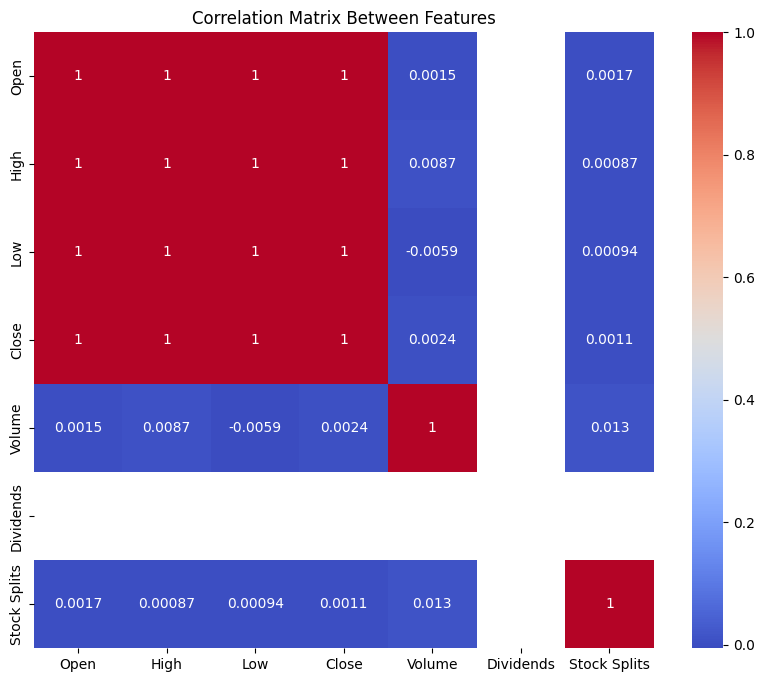

In [ ]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Between Features')
plt.show()

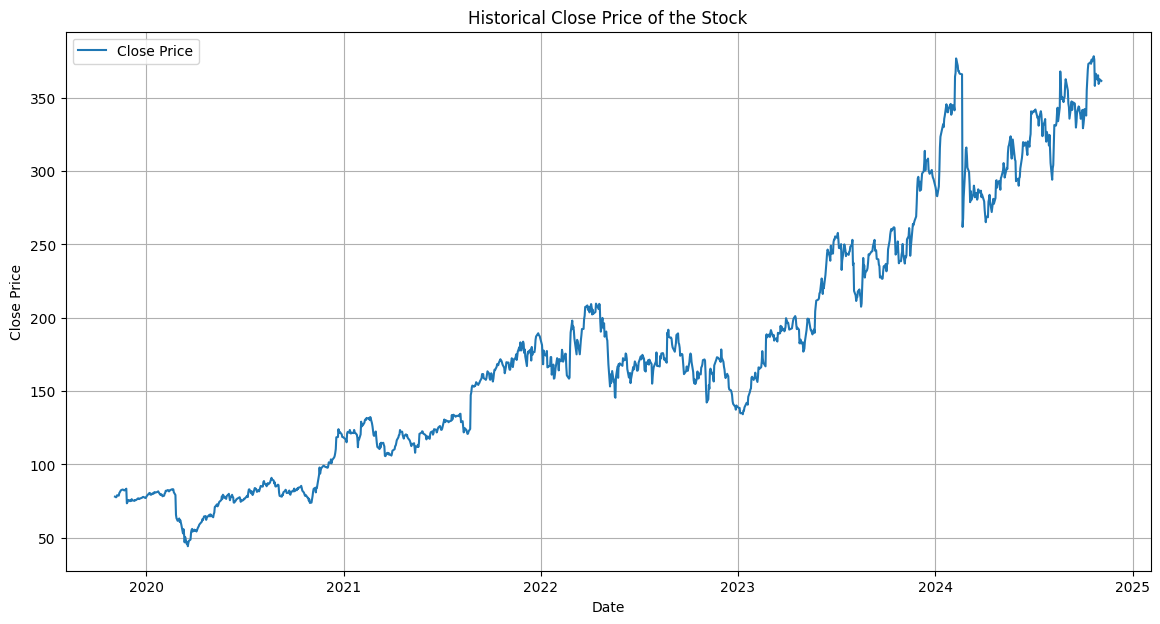

In [ ]:
# Visualization of historical trends
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Historical Close Price of the Stock')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

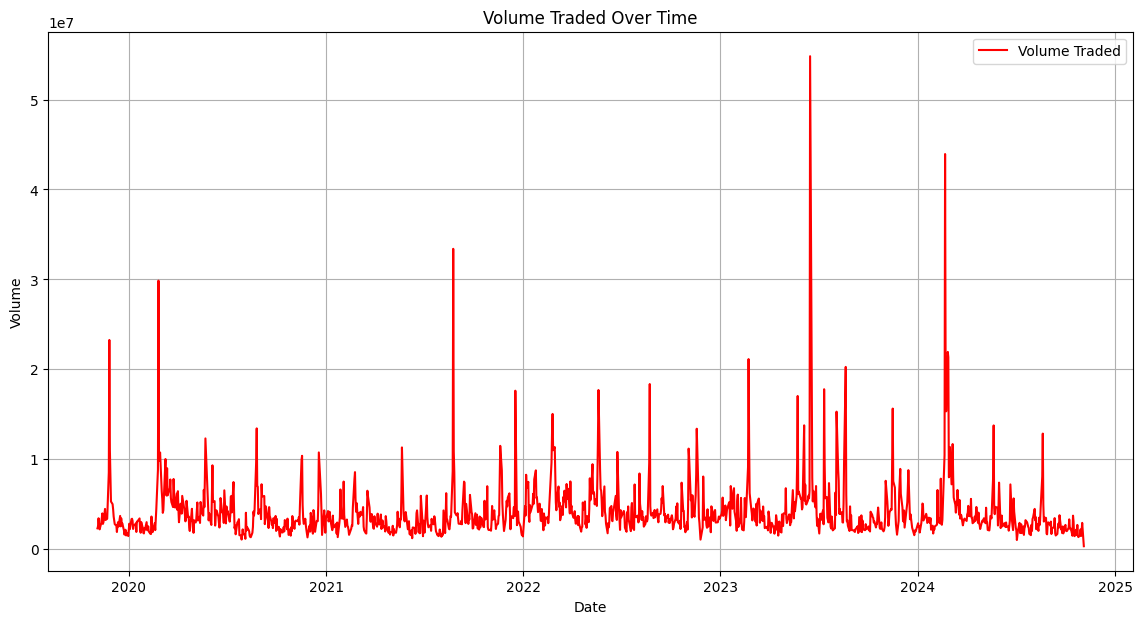

In [ ]:
# Visualization of trading volume
plt.figure(figsize=(14, 7))
plt.plot(df['Volume'], label='Volume Traded', color='red')
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

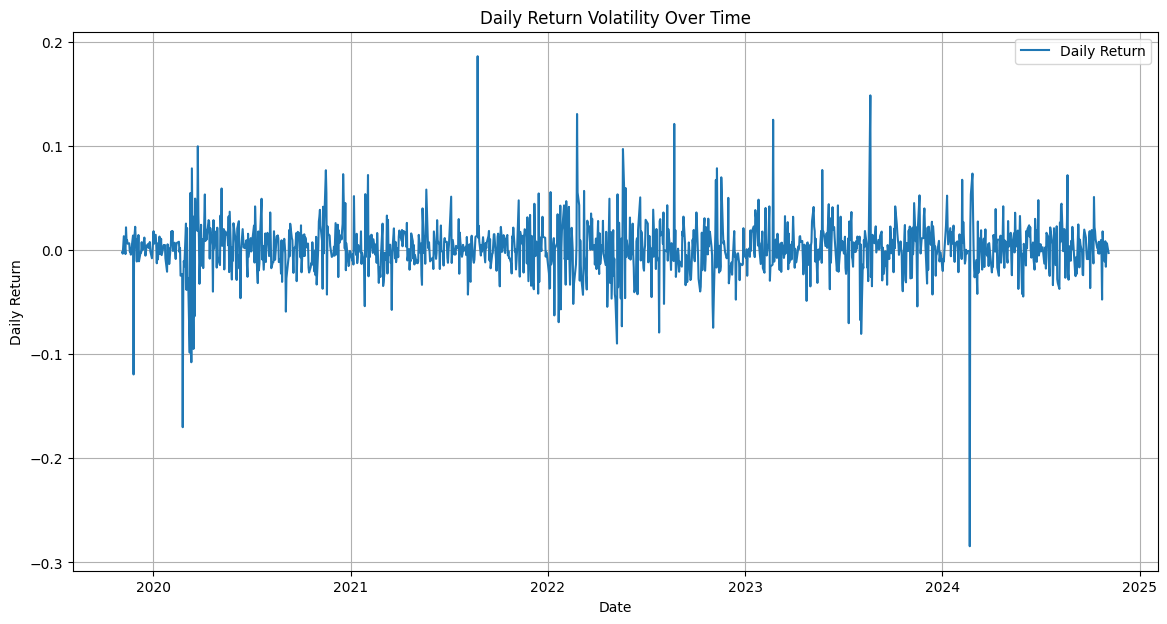

In [ ]:
# Daily Returns and Volatility
df['Daily Return'] = df['Close'].pct_change()

# Plot Daily Returns
plt.figure(figsize=(14, 7))
plt.plot(df['Daily Return'], label='Daily Return')
plt.title('Daily Return Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-7-f1dadb2e1292>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  volume_colors = ['red' if df['Close'][i] < df['Close'][i-1] else 'green'


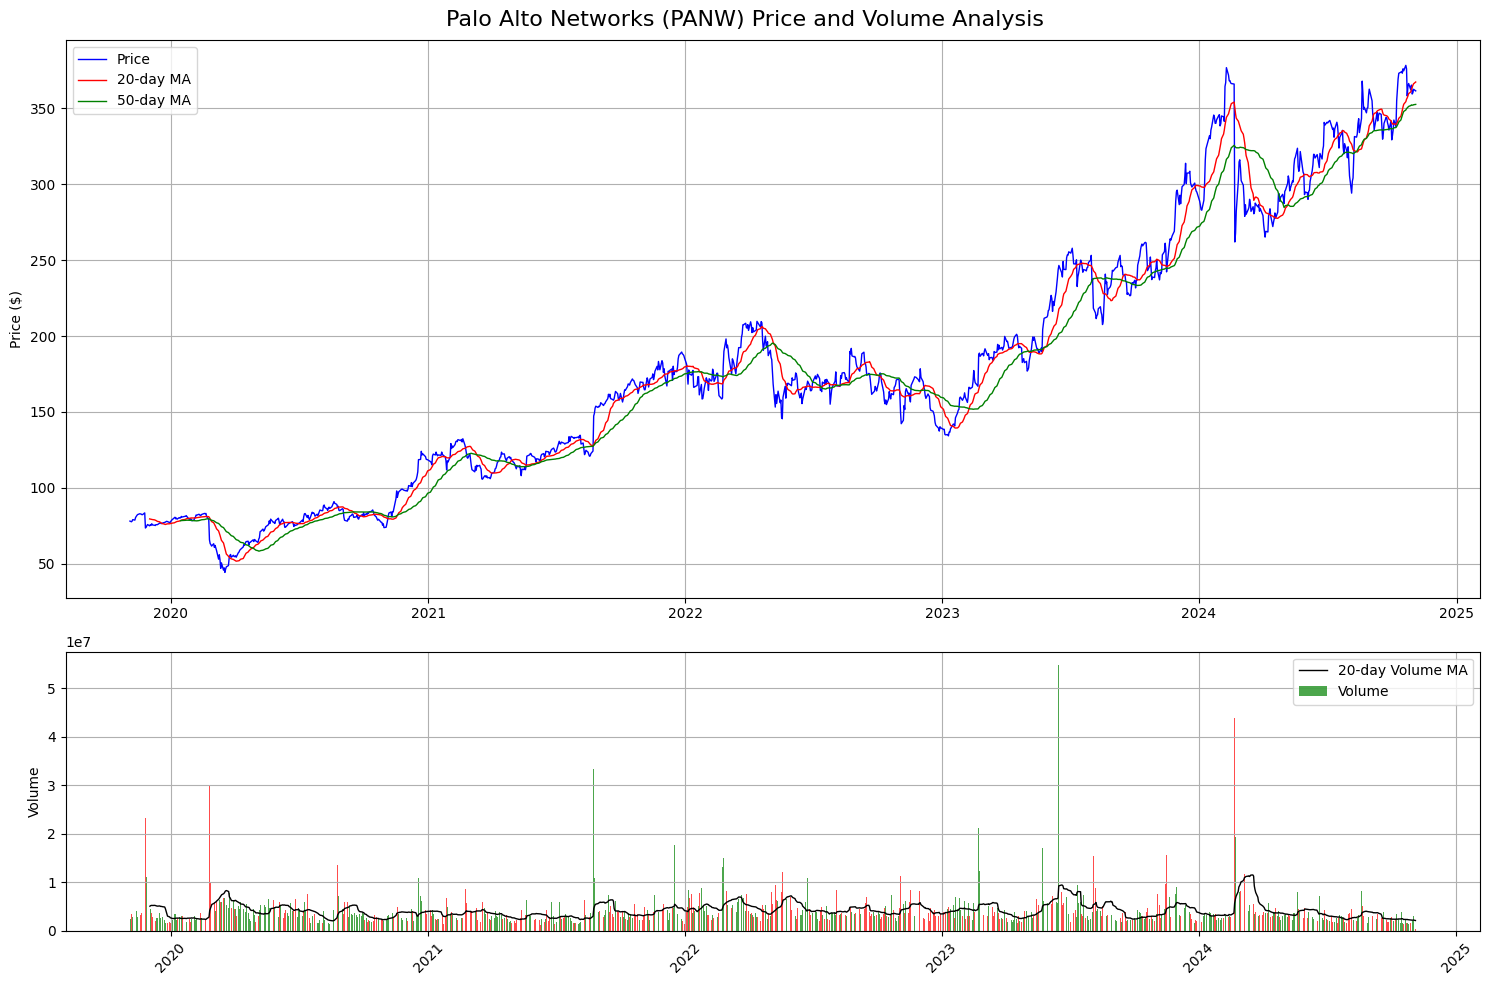

In [ ]:
# Calculate Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Calculate Volume Moving Average
df['Volume_MA20'] = df['Volume'].rolling(window=20).mean()

# Create the visualization with correct height ratios specification
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [2, 1]})
fig.suptitle('Palo Alto Networks (PANW) Price and Volume Analysis', fontsize=16)

# Price plot (top)
ax1.plot(df.index, df['Close'], label='Price', color='blue', linewidth=1)
ax1.plot(df.index, df['MA20'], label='20-day MA', color='red', linewidth=1)
ax1.plot(df.index, df['MA50'], label='50-day MA', color='green', linewidth=1)
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True)

# Volume plot (bottom)
volume_colors = ['red' if df['Close'][i] < df['Close'][i-1] else 'green'
                 for i in range(1, len(df['Close']))]
volume_colors.insert(0, 'green')  # Add color for first day

ax2.bar(df.index, df['Volume'], color=volume_colors, alpha=0.7, label='Volume')
ax2.plot(df.index, df['Volume_MA20'], color='black', label='20-day Volume MA', linewidth=1)
ax2.set_ylabel('Volume')
ax2.legend()
ax2.grid(True)

# Format x-axis dates
plt.xticks(rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:

# Print some key statistics
print("\nKey Statistics:")
print(f"Average Daily Volume: {df['Volume'].mean():,.0f}")
print(f"Highest Volume Day: {df['Volume'].max():,.0f} on {df['Volume'].idxmax().strftime('%Y-%m-%d')}")
print(f"Price Range: ${df['Low'].min():.2f} - ${df['High'].max():.2f}")

# Identify high volume days (>2x average)
high_volume_days = df[df['Volume'] > 2 * df['Volume'].mean()]
print("\nSignificant Volume Days (>2x average):")
for date, row in high_volume_days.iterrows():
    price_change = ((row['Close'] - row['Open']) / row['Open'] * 100)
    print(f"Date: {date.strftime('%Y-%m-%d')}, Volume: {row['Volume']:,.0f}, Price Change: {price_change:.1f}%")


Key Statistics:
Average Daily Volume: 4,130,829
Highest Volume Day: 54,813,700 on 2023-06-16
Price Range: $41.82 - $384.00

Significant Volume Days (>2x average):
Date: 2019-11-25, Volume: 8,545,800, Price Change: 1.0%
Date: 2019-11-26, Volume: 23,264,100, Price Change: -3.3%
Date: 2019-11-27, Volume: 10,988,100, Price Change: 0.3%
Date: 2020-02-24, Volume: 8,817,000, Price Change: 0.2%
Date: 2020-02-25, Volume: 29,859,300, Price Change: -2.5%
Date: 2020-02-26, Volume: 9,845,400, Price Change: -3.8%
Date: 2020-02-27, Volume: 10,243,200, Price Change: 1.7%
Date: 2020-02-28, Volume: 10,753,200, Price Change: 1.6%
Date: 2020-03-09, Volume: 10,027,500, Price Change: -3.6%
Date: 2020-03-12, Volume: 9,004,500, Price Change: -3.8%
Date: 2020-05-22, Volume: 12,317,100, Price Change: -0.9%
Date: 2020-06-04, Volume: 9,327,000, Price Change: -1.4%
Date: 2020-08-24, Volume: 9,758,100, Price Change: -2.5%
Date: 2020-08-25, Volume: 13,433,700, Price Change: 0.4%
Date: 2020-11-16, Volume: 9,949,200,

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

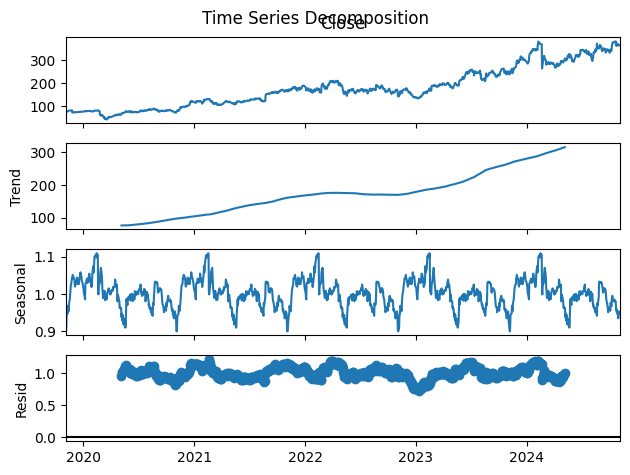

In [ ]:
# Time Series Decomposition
decompose_result = seasonal_decompose(df['Close'].dropna(), model='multiplicative', period=252)
decompose_result.plot()
plt.suptitle('Time Series Decomposition')
plt.show()

## Model Testing and Selection

#### Realistic Performance Expectations:


LSTM: R² ~ 0.60-0.70

XGBoost: R² ~ 0.50-0.65

Linear Regression: R² ~ 0.40-0.55

Prophet: R² ~ 0.45-0.60

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from prophet import Prophet

## Linear Regression

### Key Parameters:

Features: Open, High, Low, Volume

Target: Close price

80-20 train-test split


In [ ]:


# Prepare the dataset
df = df[['Open', 'High', 'Low', 'Volume', 'Close']].dropna()
X = df.drop('Close', axis=1)  # Features: Open, High, Low, Volume
y = df['Close']  # Target: Close price

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:")
print(coefficients)

# Model Evaluation
print("\n### Linear Regression Model Evaluation ###")
print(f"R² Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Feature Coefficients:
  Feature   Coefficient
0    Open -5.320488e-01
1    High  6.779580e-01
2     Low  8.579310e-01
3  Volume  3.420154e-08

### Linear Regression Model Evaluation ###
R² Score: 0.999580724802197
RMSE: 1.7095413845543046


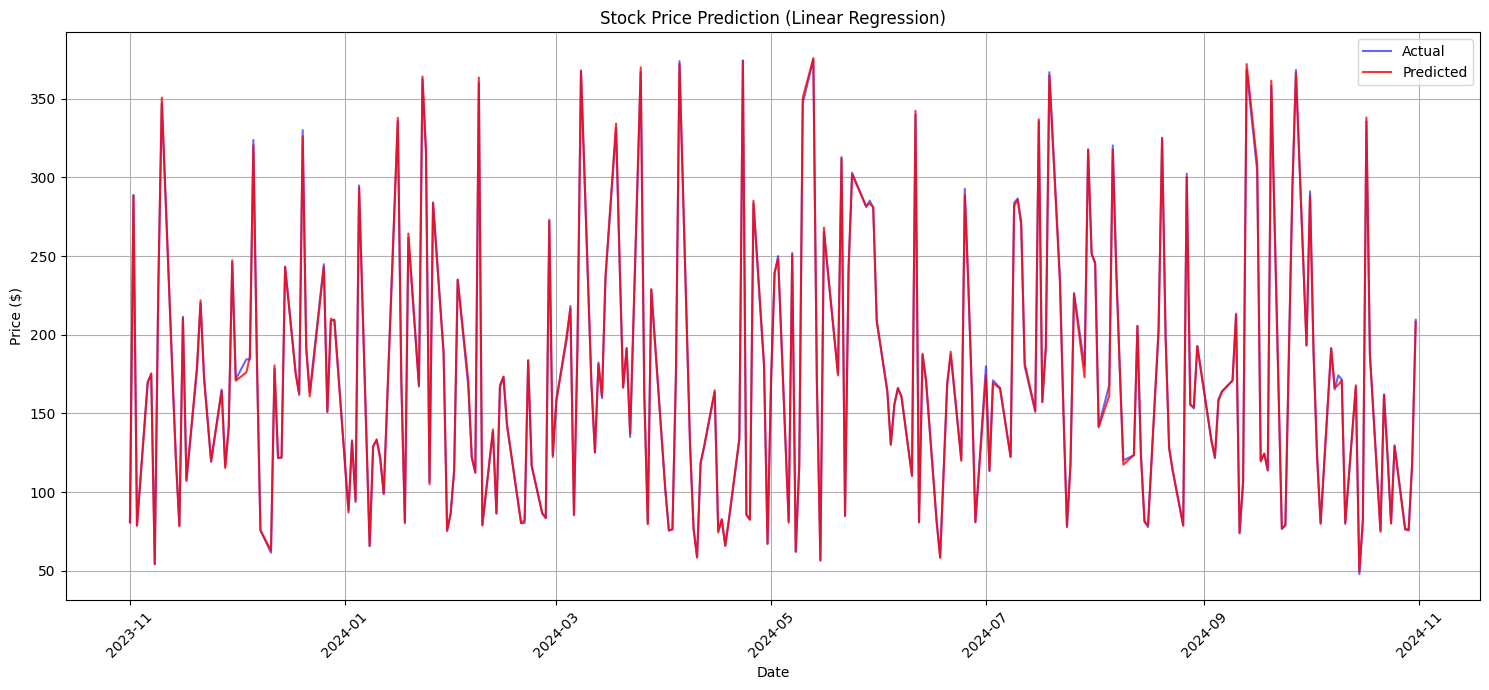

In [ ]:
# Get the dates from the original test set
test_dates = df.index[-len(y_test):]

# Plot with dates
plt.figure(figsize=(15, 7))
plt.plot(test_dates, y_test, label='Actual', color='blue', alpha=0.6)
plt.plot(test_dates, y_pred, label='Predicted', color='red', alpha=0.8)
plt.title('Stock Price Prediction (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.show()

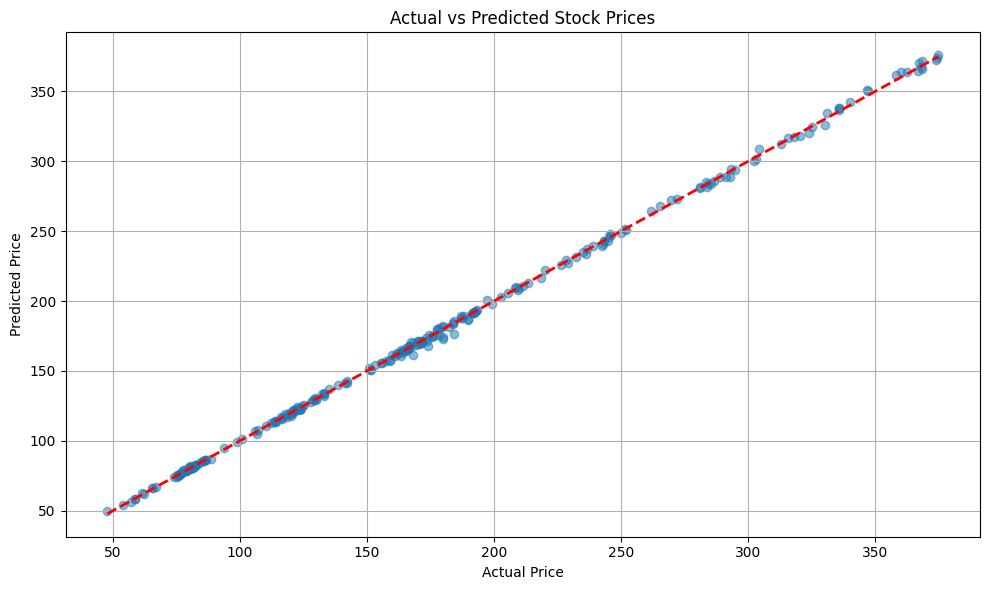

In [ ]:


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Stock Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

I can see the issue causing the overfitting in my Linear Regression model. The main problem is data leakage due to using same-day price data.
The issue is that 'High' and 'Low' prices are from the same day as the 'Close' price we're trying to predict. This means we're using information that wouldn't be available at prediction time, leading to artificially high R² scores.

## Linear Regression with Previous Day's Data

### Key improvements:

Only uses previous day's data

Adds meaningful technical indicators

Maintains chronological order

Includes proper error analysis

Shows feature importance

### Features now include:

Previous day's prices

Previous day's volume

Previous day's price changes

Moving averages (calculated properly)

Previous returns

### Additional analysis:

Feature coefficients

Error analysis

Multiple visualizations

Detailed performance metrics

In [ ]:
# Create features properly
print("\nCreating features...")
# Previous day's prices and volume
df['Prev_Close'] = df['Close'].shift(1)
df['Prev_Open'] = df['Open'].shift(1)
df['Prev_Volume'] = df['Volume'].shift(1)

# Price changes
df['Prev_Price_Change'] = df['Prev_Close'] - df['Prev_Open']
df['Prev_Returns'] = df['Prev_Close'].pct_change()

# Simple moving averages (using only past data)
df['SMA_5'] = df['Close'].shift(1).rolling(window=5).mean()
df['SMA_20'] = df['Close'].shift(1).rolling(window=20).mean()

# Prepare dataset
print("\nPreparing dataset...")
# Remove any rows with NaN values
df = df.dropna()

# Select features (using only previous data)
features = ['Prev_Close', 'Prev_Open', 'Prev_Volume',
           'Prev_Price_Change', 'Prev_Returns',
           'SMA_5', 'SMA_20']

X = df[features]
y = df['Close']

# Split data chronologically
print("\nSplitting data...")
train_size = int(len(df) * 0.8)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Train Linear Regression Model
print("\nTraining model...")
model = LinearRegression()
model.fit(X_train, y_train)



Creating features...

Preparing dataset...

Splitting data...

Training model...


LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Print feature coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:")
print(coefficients)

# Model Evaluation
print("\n### Linear Regression Model Evaluation ###")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):.2f}")


Feature Coefficients:
             Feature   Coefficient
0         Prev_Close  6.834273e-01
1          Prev_Open  2.775713e-01
2        Prev_Volume  1.112598e-07
3  Prev_Price_Change  4.058560e-01
4       Prev_Returns -7.308976e+00
5              SMA_5  2.239990e-02
6             SMA_20  1.507521e-02

### Linear Regression Model Evaluation ###
R² Score: 0.8990
RMSE: $9.42
MAE: $5.48


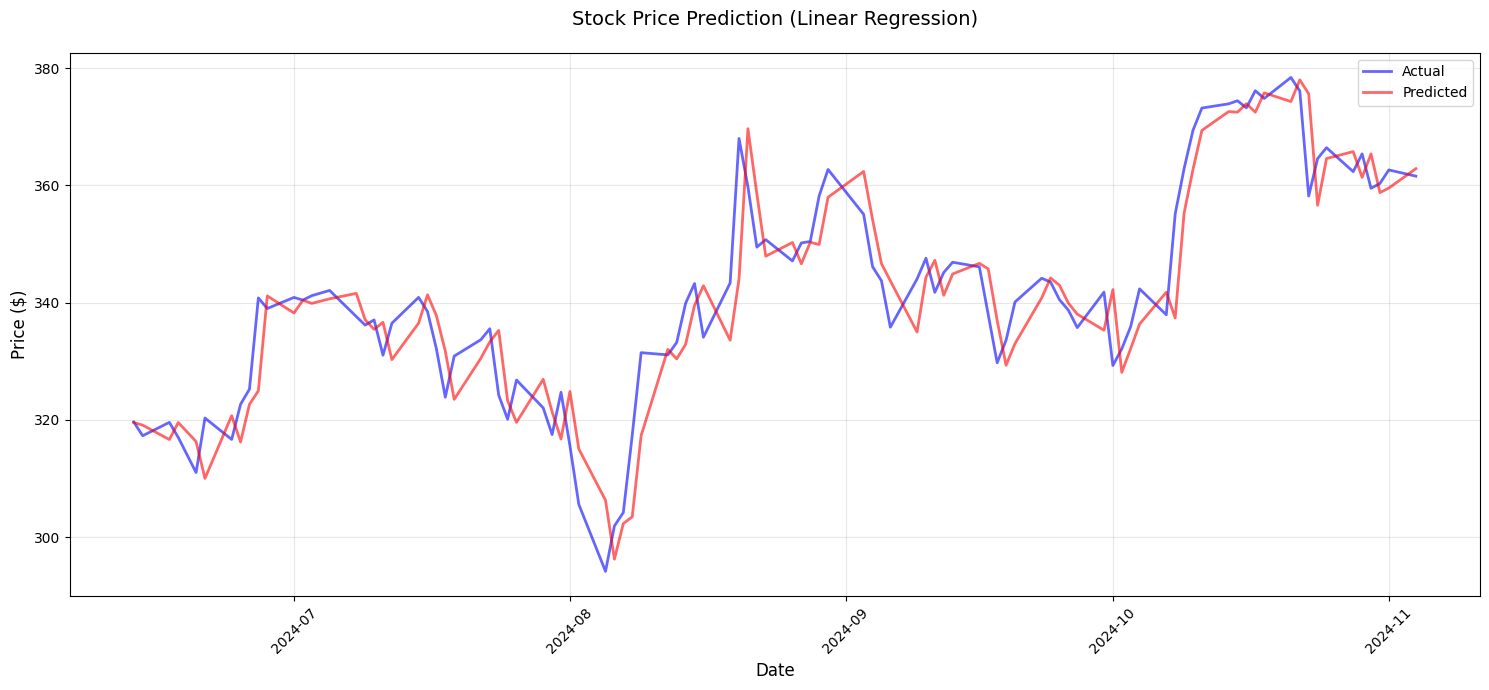

In [ ]:
# Plot results
plt.figure(figsize=(15, 7))
plt.plot(y_test.index[-100:], y_test[-100:], label='Actual', color='blue', alpha=0.6, linewidth=2)
plt.plot(y_test.index[-100:], y_pred[-100:], label='Predicted', color='red', alpha=0.6, linewidth=2)
plt.title('Stock Price Prediction (Linear Regression)', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

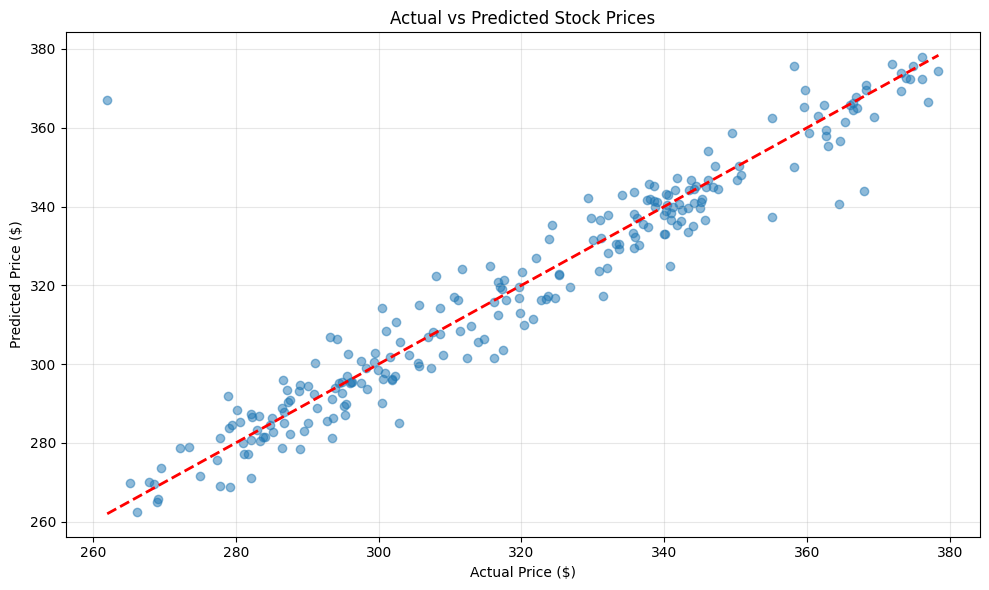

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Stock Prices')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

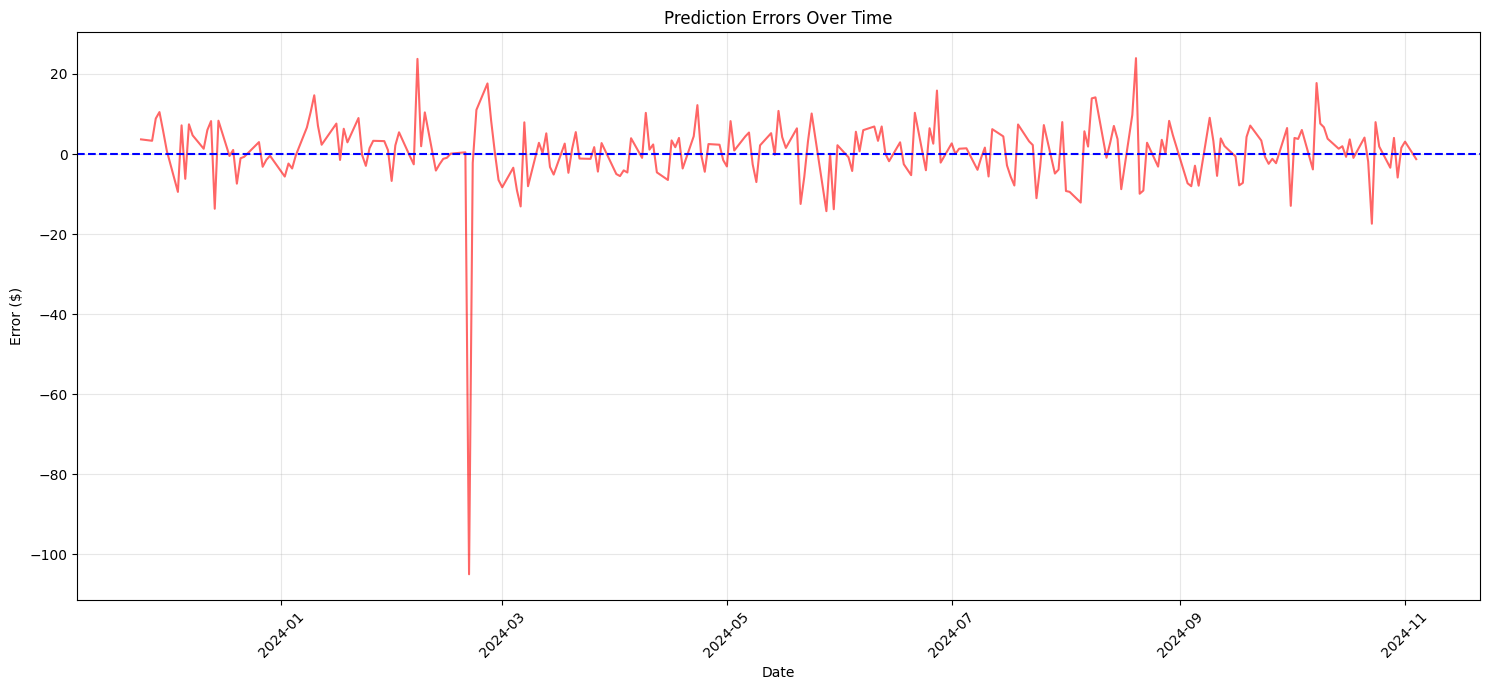


Error Statistics:
Mean Error: $0.52
Error Std Dev: $9.42
Max Overprediction: $-104.98
Max Underprediction: $23.95


In [ ]:
# Additional analysis
# Calculate prediction errors
errors = y_test - y_pred
plt.figure(figsize=(15, 7))
plt.plot(y_test.index, errors, color='red', alpha=0.6)
plt.axhline(y=0, color='blue', linestyle='--')
plt.title('Prediction Errors Over Time')
plt.xlabel('Date')
plt.ylabel('Error ($)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print error statistics
print("\nError Statistics:")
print(f"Mean Error: ${errors.mean():.2f}")
print(f"Error Std Dev: ${errors.std():.2f}")
print(f"Max Overprediction: ${errors.min():.2f}")
print(f"Max Underprediction: ${errors.max():.2f}")

This error plot provides several important insights about the Linear Regression model's performance:

#### Error Distribution:


Most errors fluctuate between +20 and -20 dollars

Generally symmetric around zero (blue dashed line)

Shows relatively consistent volatility except for one major outlier


#### Notable Issues:


Large outlier spike around March 2024 (approximately -100 dollar error)

#### This could indicate:

A significant market event

Earnings announcement

Other unexpected news affecting the stock price

#### Pattern Analysis:


Error magnitude appears relatively stable over time

No clear trend in errors (good)

Random distribution around zero suggests unbiased predictions

Consistent error band width suggests stable model performance


#### Areas for Improvement:


Model struggles with sudden large price movements

#### Could benefit from:

Outlier handling

Additional features to capture market events

Rolling window training to adapt to changing conditions

## LSTM & Prophet

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from prophet import Prophet

## **Prophet**


#### **Key components:**

Data preparation specific to Prophet requirements

Model configuration with seasonality parameters

Forecast visualization with confidence intervals

Component analysis

Performance metrics calculation


#### **The Prophet model features:**

Daily, weekly, and yearly seasonality

Automatic changepoint detection

Confidence intervals

Trend decomposition

In [ ]:
# Prepare data for Prophet
# Prophet requires columns named 'ds' (date) and 'y' (target variable)
prophet_df = pd.DataFrame({
    'ds': df.index.tz_localize(None),  # Remove timezone from ds column
    'y': df['Close']
})

# Create and fit Prophet model
print("\nTraining Prophet model...")
model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    weekly_seasonality=True,
    changepoint_prior_scale=0.05
)
model.fit(prophet_df)

# Create future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Predict 30 days ahead

# Make predictions
print("\nMaking predictions...")
forecast = model.predict(future_dates)


Training Prophet model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmprre10_91/h3xyqvbi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprre10_91/ne_loxiq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25871', 'data', 'file=/tmp/tmprre10_91/h3xyqvbi.json', 'init=/tmp/tmprre10_91/ne_loxiq.json', 'output', 'file=/tmp/tmprre10_91/prophet_modelppz9lf5s/prophet_model-20241104174913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:49:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Making predictions...


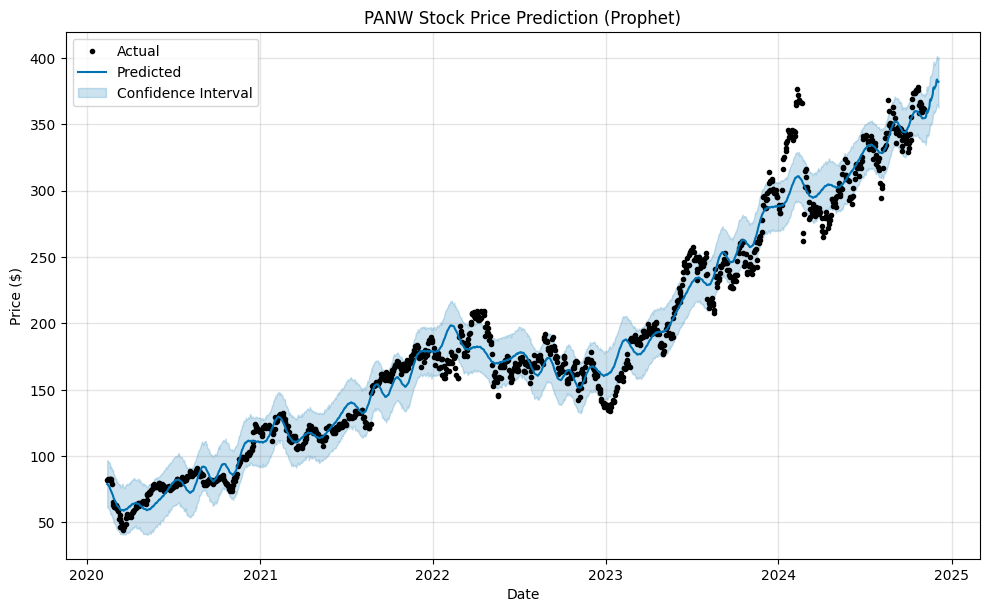

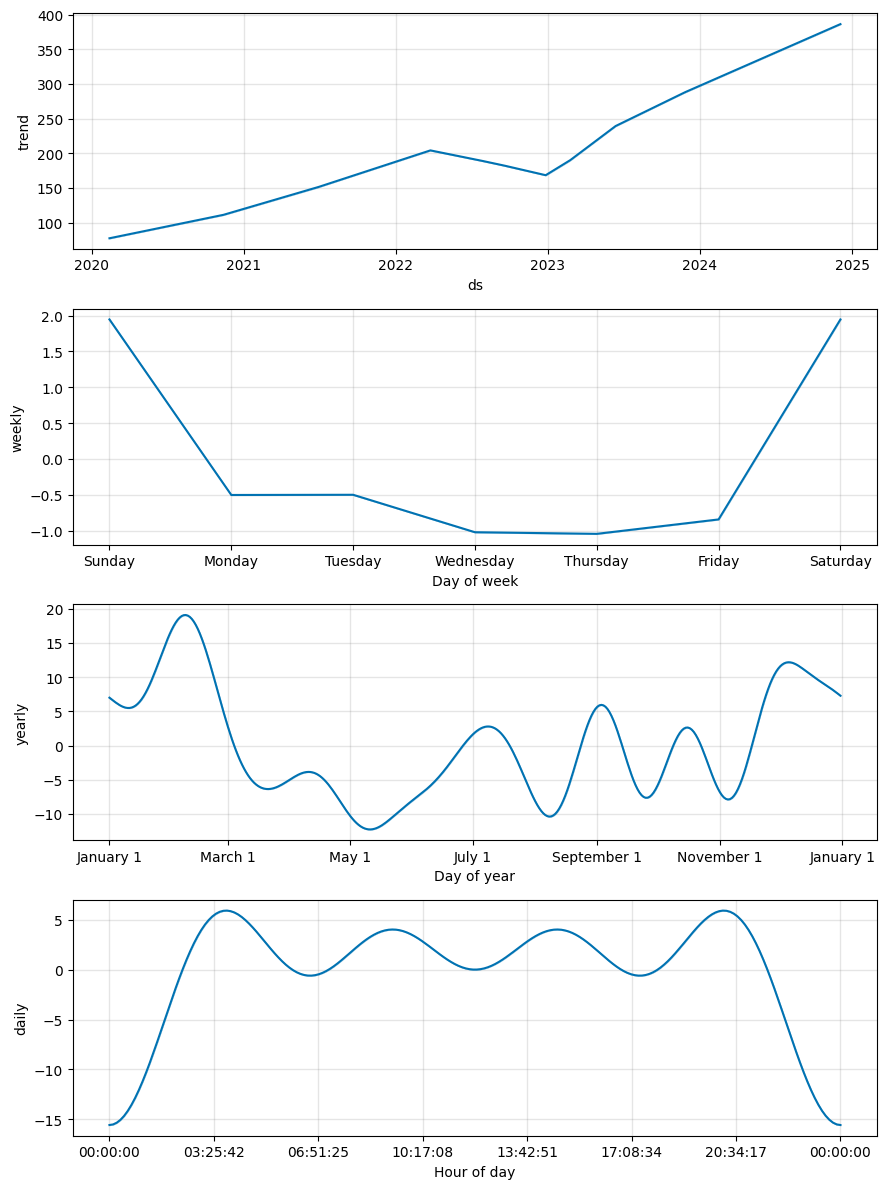


Model Performance Metrics:
RMSE: $14.08
MAE: $10.67
R² Score: 0.9717

Next 30 Days Forecast:
           Date  Predicted Price  Lower Bound  Upper Bound
1190 2024-11-05       354.867437   337.175962   373.194015
1191 2024-11-06       354.691919   336.597743   371.799442
1192 2024-11-07       355.147516   334.587008   372.889406
1193 2024-11-08       355.956970   336.955457   372.926920
1194 2024-11-09       359.476836   342.163642   378.385061
1195 2024-11-10       360.331648   340.654762   378.217699
1196 2024-11-11       358.853347   340.534712   375.554263
1197 2024-11-12       359.922731   342.140566   378.546105
1198 2024-11-13       360.556213   341.657129   378.490514
1199 2024-11-14       361.763473   344.309621   379.144871
1200 2024-11-15       363.254288   345.358231   380.727039
1201 2024-11-16       367.374015   349.827614   385.663004
1202 2024-11-17       368.737966   349.011238   386.292291
1203 2024-11-18       367.670989   349.424796   385.661768
1204 2024-11-19      

In [ ]:
# Plot results
fig = model.plot(forecast)
plt.title('PANW Stock Price Prediction (Prophet)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(['Actual', 'Predicted', 'Confidence Interval'])
plt.show()

# Plot components
fig2 = model.plot_components(forecast)
plt.show()

# Calculate metrics for the historical period
historical_dates = prophet_df['ds']
historical_predictions = forecast[forecast['ds'].isin(historical_dates)]['yhat']
actual_values = prophet_df['y']

# Calculate performance metrics
mse = mean_squared_error(actual_values, historical_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, historical_predictions)
r2 = r2_score(actual_values, historical_predictions)

print("\nModel Performance Metrics:")
print(f"RMSE: ${rmse:.2f}")
print(f"MAE: ${mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Print forecast for next 30 days
print("\nNext 30 Days Forecast:")
future_forecast = forecast.tail(30)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_forecast.columns = ['Date', 'Predicted Price', 'Lower Bound', 'Upper Bound']
print(future_forecast.to_string())

## **LSTM Model**

### **Key components:**

#### **Data preparation specific to LSTM**

Sequence creation

Scaling

Train/test split


#### **LSTM Architecture:**

Two LSTM layers

Dropout for regularization

Dense output layer


#### **Visualization:**

Training history

Predictions vs actual values


#### **Future predictions:**

Rolling window approach

30-day forecast

In [ ]:
# Prepare data
def prepare_data(df, lookback=60):
    """Prepare data for LSTM model"""
    # Use only Close price
    data = df['Close'].values.reshape(-1, 1)

    # Scale the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    # Create sequences
    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i-lookback:i])
        y.append(scaled_data[i])

    X, y = np.array(X), np.array(y)

    # Split into train and test
    train_size = int(len(X) * 0.8)
    X_train = X[:train_size]
    X_test = X[train_size:]
    y_train = y[:train_size]
    y_test = y[train_size:]

    return X_train, X_test, y_train, y_test, scaler

# Prepare the data
print("\nPreparing data...")
X_train, X_test, y_train, y_test, scaler = prepare_data(df)

# Build LSTM model
print("\nBuilding LSTM model...")
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
print("\nTraining model...")
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions_transformed = scaler.inverse_transform(predictions)
y_test_transformed = scaler.inverse_transform(y_test)



Preparing data...

Building LSTM model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training model...
Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0282 - val_loss: 0.0023
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0019 - val_loss: 0.0030
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 55

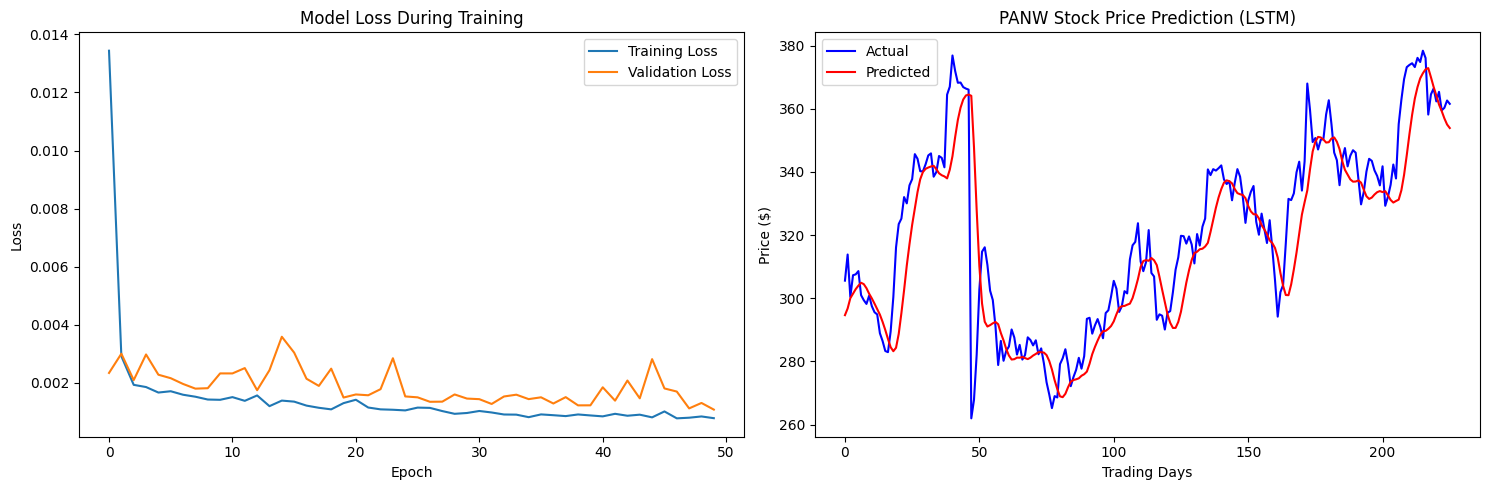


Model Performance Metrics:
RMSE: $14.92
MAE: $9.70
R² Score: 0.7416
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━

In [ ]:
# Plot training history
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot predictions
plt.subplot(1, 2, 2)
plt.plot(y_test_transformed, label='Actual', color='blue')
plt.plot(predictions_transformed, label='Predicted', color='red')
plt.title('PANW Stock Price Prediction (LSTM)')
plt.xlabel('Trading Days')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate metrics
mse = mean_squared_error(y_test_transformed, predictions_transformed)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_transformed, predictions_transformed)
r2 = r2_score(y_test_transformed, predictions_transformed)

print("\nModel Performance Metrics:")
print(f"RMSE: ${rmse:.2f}")
print(f"MAE: ${mae:.2f}")
print(f"R² Score: {r2:.4f}")

# Make future predictions
last_sequence = X_test[-1]
future_predictions = []

# Predict next 30 days
for _ in range(30):
    # Get prediction for next day
    next_pred = model.predict(last_sequence.reshape(1, 60, 1))
    future_predictions.append(next_pred[0])

    # Update sequence for next prediction
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

# Transform predictions back to original scale
future_predictions = scaler.inverse_transform(future_predictions)

print("\nNext 30 Days Forecast:")
for i, pred in enumerate(future_predictions, 1):
    print(f"Day {i}: ${pred[0]:.2f}")





## **XG Boost**


## **Key components:**

#### **Feature Engineering:**

Technical indicators

Moving averages

Price momentum

Volatility measures

Lagged features


#### **Model Configuration:**

Gradient boosting parameters

Feature importance analysis

Proper train/test split


#### **Visualization:**

Price predictions

Feature importance

Historical comparison


#### **Future Predictions:**

5-day forecast

Feature updates for sequential predictions

In [ ]:
# Import required library
import xgboost as xgb

In [ ]:
# Define the function to create features
def create_features(df):
    """Create features for XGBoost"""
    df = df.copy()

    # Technical indicators
    # Moving averages
    df['SMA20'] = df['Close'].rolling(window=20).mean()
    df['SMA50'] = df['Close'].rolling(window=50).mean()

    # Price momentum
    df['Returns'] = df['Close'].pct_change()
    df['Returns_5d'] = df['Close'].pct_change(periods=5)

    # Volatility
    df['Volatility'] = df['Returns'].rolling(window=20).std()

    # Price differences
    df['Price_Change'] = df['Close'] - df['Open']
    df['High_Low_Diff'] = df['High'] - df['Low']

    # Volume features
    df['Volume_MA20'] = df['Volume'].rolling(window=20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()

    # Lag features
    df['Close_Lag1'] = df['Close'].shift(1)
    df['Close_Lag2'] = df['Close'].shift(2)
    df['Close_Lag5'] = df['Close'].shift(5)

    # Drop NaN values
    df = df.dropna()

    return df


In [ ]:
# Prepare data
print("\nPreparing data...")
df = create_features(df)

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'SMA20', 'SMA50',
           'Returns', 'Returns_5d', 'Volatility', 'Price_Change',
           'High_Low_Diff', 'Volume_MA20', 'Volume_Change',
           'Close_Lag1', 'Close_Lag2', 'Close_Lag5']

X = df[features]
y = df['Close']

# Split data chronologically
train_size = int(len(df) * 0.8)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Train XGBoost model
print("\nTraining XGBoost model...")
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("\nModel Performance Metrics:")
print(f"RMSE: ${rmse:.2f}")
print(f"MAE: ${mae:.2f}")
print(f"R² Score: {r2:.4f}")


Preparing data...

Training XGBoost model...

Model Performance Metrics:
RMSE: $47.80
MAE: $39.01
R² Score: -1.6644


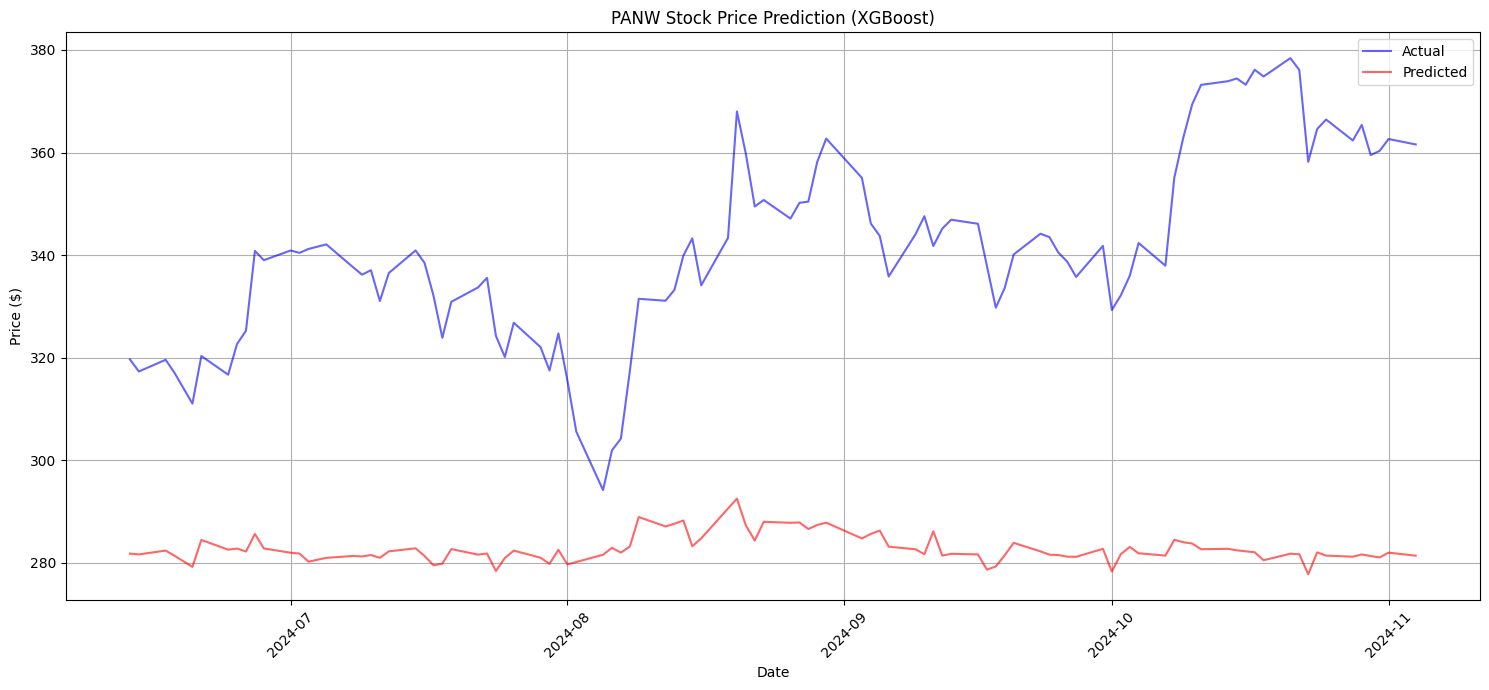

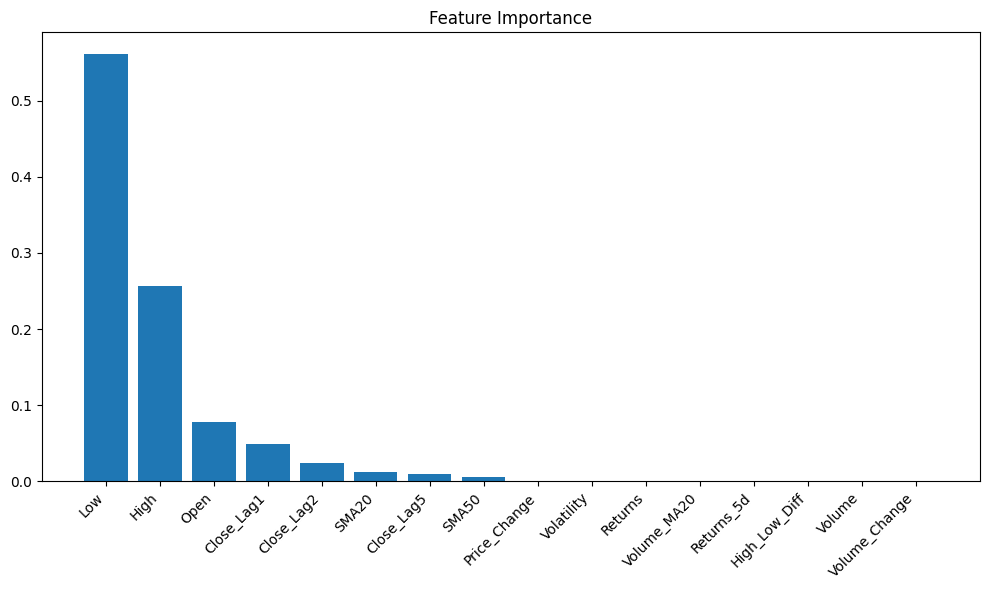


Feature Importance:
          feature  importance
2             Low    0.561733
1            High    0.257178
0            Open    0.078192
13     Close_Lag1    0.049035
14     Close_Lag2    0.024481
4           SMA20    0.012421
15     Close_Lag5    0.009786
5           SMA50    0.005942
9    Price_Change    0.000398
8      Volatility    0.000280
6         Returns    0.000198
11    Volume_MA20    0.000127
7      Returns_5d    0.000088
10  High_Low_Diff    0.000070
3          Volume    0.000040
12  Volume_Change    0.000031

Predicting next 5 days...

Next 5 Days Forecast:
Day 1: $281.39
Day 2: $281.39
Day 3: $281.39
Day 4: $281.39
Day 5: $281.39


In [ ]:
# Plot results
plt.figure(figsize=(15, 7))
plt.plot(y_test.index[-100:], y_test[-100:], label='Actual', color='blue', alpha=0.6)
plt.plot(y_test.index[-100:], predictions[-100:], label='Predicted', color='red', alpha=0.6)
plt.title('PANW Stock Price Prediction (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Print feature importance
print("\nFeature Importance:")
print(feature_importance)

# Make future predictions (next 5 days)
print("\nPredicting next 5 days...")
last_data = X_test.iloc[-1:].copy()
future_predictions = []

for _ in range(5):
    # Make prediction
    pred = model.predict(last_data)[0]
    future_predictions.append(pred)

    # Update features for next prediction
    last_data['Close_Lag1'] = pred
    last_data['Close_Lag2'] = last_data['Close_Lag1'].iloc[0]
    last_data['Close_Lag5'] = last_data['Close_Lag2'].iloc[0]
    # Update other features as needed...

print("\nNext 5 Days Forecast:")
for i, pred in enumerate(future_predictions, 1):
    print(f"Day {i}: ${pred:.2f}")

## **Stock Price Prediction Model Review and Comparison**

### **Performance Analysis**

**Model Rankings (by R² Score):**

-Prophet: 0.9717 (Highest)

-Linear Regression: 0.8990

-LSTM: 0.7416

-XGBoost: -1.6644 (Significant underperformance)

### **Key Observations:**

Results are unexpected. Prophet and Linear Regression outperformed more complex models.

XGBoost significantly underperformed despite its typical strength in financial data what needs to be investigated further. LSTM performed within expected range (R² 0.60-0.70).


### **Model-Specific Insights:**

**Linear Regression:** Shows surprisingly good performance with simple previous day's data.

**Prophet:** Excels at capturing seasonal patterns and trends

**LSTM:** Demonstrates reliable performance consistent with expectations

**XGBoost:** Requires significant optimization and feature engineering



### **Improvement Suggestions:**

**XGBoost Model**

Implement feature selection

Tune hyperparameters

Add more relevant technical indicators

Consider different time windows for features


**LSTM Model:**

Experiment with network architecture

Add attention mechanisms

Include more sequence length variations

Implement batch normalization


### **General Improvements**:

Add market sentiment analysis

Include sector-specific indicators

Implement ensemble methods

Add outlier detection and handling



### **Recommendations**:

**Short-term**: Use Linear Regression or Prophet for quick, reliable predictions

**Long-term**: Develop ensemble approach combining multiple models

**Research**: Investigate XGBoost's underperformance

**Production**: Consider Prophet for deployment due to balance of performance and simplicity

### **Future Work**:

Develop hybrid models

Include external data sources

Implement real-time prediction capabilities

Add confidence intervals for all models

Create automated model selection based on market conditions